In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Dados de treinamento das máquinas
consumo_energia = np.array([1000, 3000, 1500, 2500, 1200, 3500])
tempo_operacao = np.array([200, 500, 300, 400, 250, 600])
tipo_energia = np.array(['Elétrica', 'Gás', 'Elétrica', 'Gás', 'Elétrica', 'Gás'])
classificacao = np.array(['Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 'Ineficiente'])

In [17]:
# Transformar tipo de energia em valores numéricos (0 = Elétrica, 1 = Gás)
tipo_energia_num = np.array([0 if t == 'Elétrica' else 1 for t in tipo_energia])

In [18]:
# Criar matriz de características (features)
X = np.column_stack((consumo_energia, tempo_operacao, tipo_energia_num))

In [19]:
# Dividir dados em treino e teste (80% treino, 20% teste)
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, classificacao, test_size=0.2, random_state=42
)

In [20]:
# Criar e treinar o modelo de árvore de decisão
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=42)

In [21]:
# Fazer previsões
previsoes = modelo.predict(X_teste)

In [22]:
# Calcular métricas
acuracia = accuracy_score(y_teste, previsoes)

print("=" * 60)
print("CLASSIFICAÇÃO DE MÁQUINAS INDUSTRIAIS")
print("Árvore de Decisão - Eficiência Energética")
print("=" * 60)
print(f"\nAcurácia do modelo: {acuracia * 100:.2f}%")
print(f"\nDados de teste:")
print(f"Valores reais: {y_teste}")
print(f"Previsões: {previsoes}")

CLASSIFICAÇÃO DE MÁQUINAS INDUSTRIAIS
Árvore de Decisão - Eficiência Energética

Acurácia do modelo: 100.00%

Dados de teste:
Valores reais: ['Eficiente' 'Ineficiente']
Previsões: ['Eficiente' 'Ineficiente']


In [23]:
# Testar com novos dados
print("\n" + "=" * 60)
print("TESTE COM NOVOS DADOS")
print("=" * 60)


TESTE COM NOVOS DADOS


In [24]:
# Exemplo 1: Máquina elétrica com baixo consumo
nova_maquina1 = np.array([[1100, 220, 0]])  # Elétrica
previsao1 = modelo.predict(nova_maquina1)
print(f"\nMáquina 1:")
print(f"  Consumo: 1100 kWh | Tempo: 220h | Tipo: Elétrica")
print(f"  Classificação prevista: {previsao1[0]}")


Máquina 1:
  Consumo: 1100 kWh | Tempo: 220h | Tipo: Elétrica
  Classificação prevista: Eficiente


In [25]:
# Exemplo 2: Máquina a gás com alto consumo
nova_maquina2 = np.array([[3200, 550, 1]])  # Gás
previsao2 = modelo.predict(nova_maquina2)
print(f"\nMáquina 2:")
print(f"  Consumo: 3200 kWh | Tempo: 550h | Tipo: Gás")
print(f"  Classificação prevista: {previsao2[0]}")


Máquina 2:
  Consumo: 3200 kWh | Tempo: 550h | Tipo: Gás
  Classificação prevista: Ineficiente



Gerando visualização da árvore de decisão...


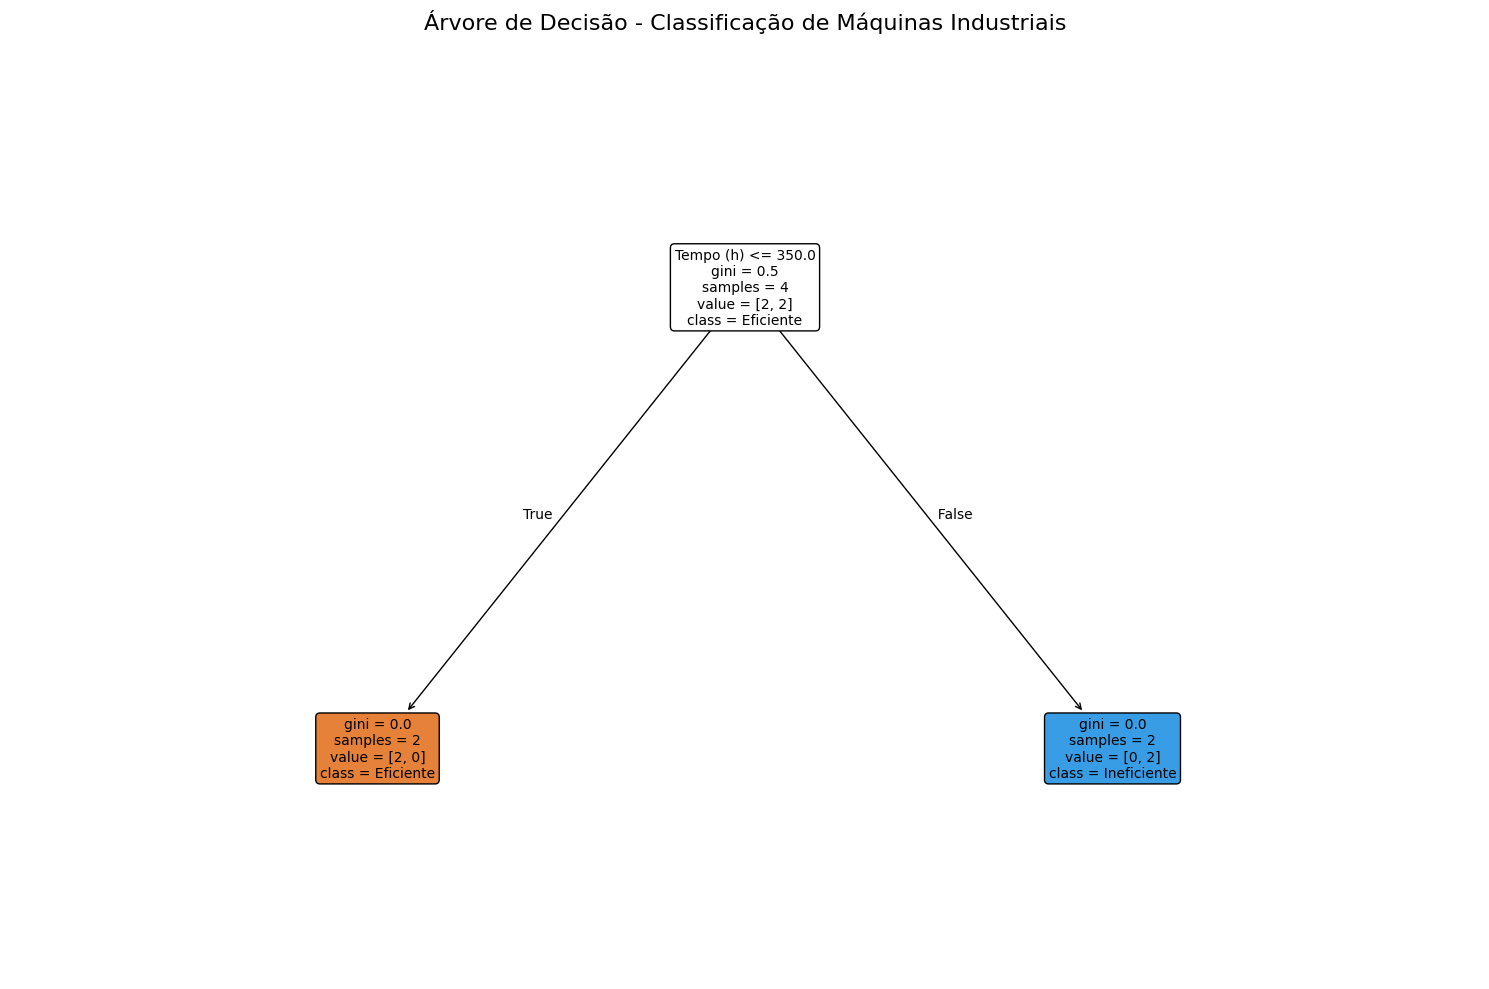

In [26]:
# Visualizar a árvore de decisão
print("\n" + "=" * 60)
print("Gerando visualização da árvore de decisão...")
print("=" * 60)

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(modelo, 
               feature_names=['Consumo (kWh)', 'Tempo (h)', 'Tipo Energia'],
               class_names=['Eficiente', 'Ineficiente'],
               filled=True,
               rounded=True,
               fontsize=10)
plt.title('Árvore de Decisão - Classificação de Máquinas Industriais', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_28904\273311764.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classificacao, y=consumo_energia, palette='viridis')


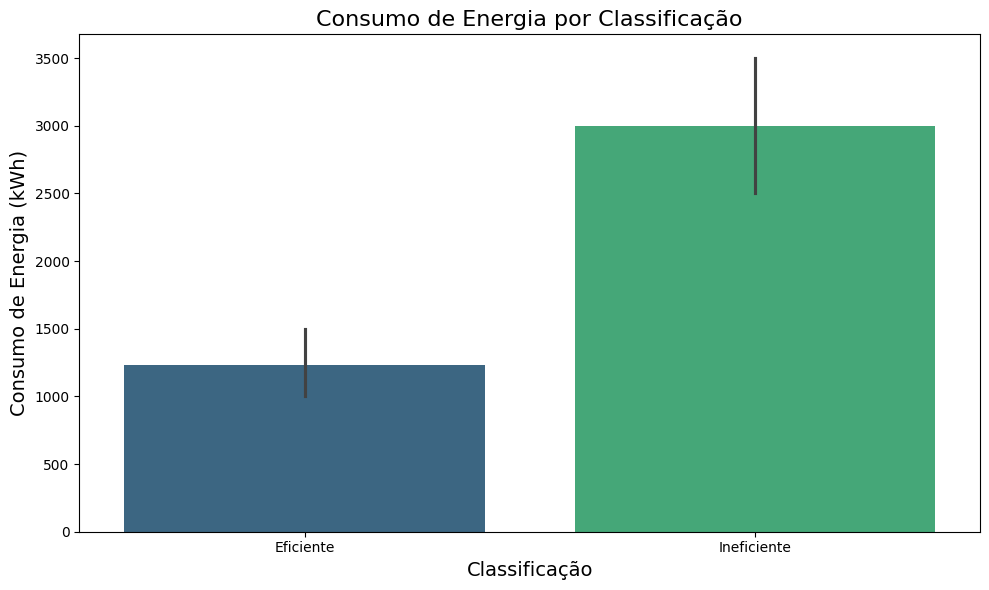

In [27]:
# Gráfico de barras - Consumo por Classificação
plt.figure(figsize=(10, 6))
sns.barplot(x=classificacao, y=consumo_energia, palette='viridis')
plt.title('Consumo de Energia por Classificação', fontsize=16)
plt.xlabel('Classificação', fontsize=14)
plt.ylabel('Consumo de Energia (kWh)', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\dsadm\AppData\Local\Temp\ipykernel_28904\2357574916.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=classificacao, y=tempo_operacao, palette='coolwarm')


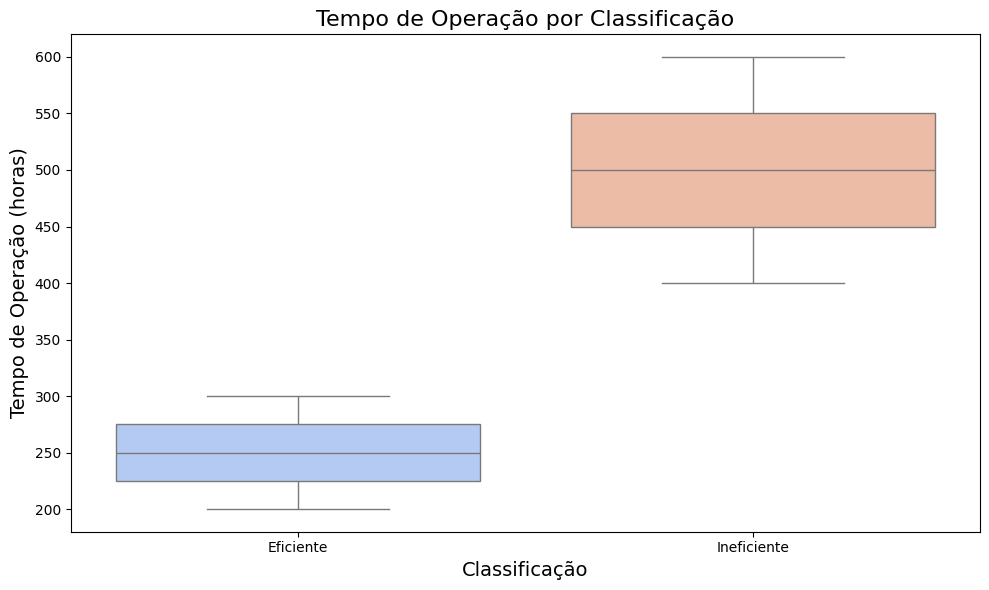


Análise concluída!


In [28]:
# Box plot - Tempo de Operação por Classificação
plt.figure(figsize=(10, 6))
sns.boxplot(x=classificacao, y=tempo_operacao, palette='coolwarm')
plt.title('Tempo de Operação por Classificação', fontsize=16)
plt.xlabel('Classificação', fontsize=14)
plt.ylabel('Tempo de Operação (horas)', fontsize=14)
plt.tight_layout()
plt.show()

print("\nAnálise concluída!")